In [1]:
import numpy as np
nl = np.random.randint(0, 1000, 9*10**6).reshape((3000,3000))

def sq_euclidean(X):
    XX = np.sum(X * X, axis=1)[:, np.newaxis]
    Y = X
    YY = XX.T
    distances = np.dot(X, Y.T)
    distances *= -2
    distances += XX
    distances += YY
    # remove floating point rounding errors
    np.maximum(distances, 0, distances)
    distances.flat[::distances.shape[0] + 1] = 0.0

for dtype in ['int16', 'int32', 'int64', 'float32', 'float64']:
    X = nl.astype(np.dtype(dtype), copy=True)
    %time sq_euclidean(X)

CPU times: user 14 s, sys: 54.4 ms, total: 14.1 s
Wall time: 14.1 s
CPU times: user 14.3 s, sys: 49.6 ms, total: 14.3 s
Wall time: 14.4 s
CPU times: user 16.1 s, sys: 99 ms, total: 16.2 s
Wall time: 16.1 s
CPU times: user 903 ms, sys: 55.6 ms, total: 959 ms
Wall time: 458 ms
CPU times: user 1.31 s, sys: 57.9 ms, total: 1.37 s
Wall time: 371 ms


# NumPy - Numerical Python

In [2]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [2]:
import numpy as np

In [4]:
np.__version__

'1.12.1'

In [5]:
np.array([1, 2, 3, 4], dtype='float128')

array([ 1.0,  2.0,  3.0,  4.0], dtype=float128)

# Creating

In [6]:
# Create a length-10 integer array filled with zeros 
np.zeros((2, 3), dtype=int)

array([[0, 0, 0],
       [0, 0, 0]])

In [7]:
np.ones((2, 2, 2, 2), dtype=float)

array([[[[ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.]]],


       [[[ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.]]]])

In [8]:
np.full((3, 5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

In [9]:
 # Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function) 
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [10]:
# Create an array of five values evenly spaced between 0 and 1 
np.linspace(0, 1, 9)

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ])

In [11]:
# Create a 3x3 array of uniformly distributed # random values between 0 and 1
np.random.random((3, 3))

array([[ 0.52791507,  0.8742402 ,  0.33365986],
       [ 0.80994228,  0.38783464,  0.15933571],
       [ 0.31927297,  0.60424761,  0.00841077]])

In [12]:
# Create a 3x3 array of normally distributed random values 
# with mean 0 and standard deviation 1 
np.random.normal(0, 1, (3, 3))

array([[ 1.78972753,  0.01281898,  0.92636347],
       [ 0.37021563, -0.01916003,  1.20547736],
       [-0.21367807,  0.1004782 ,  0.43452875]])

In [13]:
# Create a 3x3 array of random integers in the interval [0, 10) 
np.random.randint(0, 10, (3, 3))

array([[4, 4, 0],
       [5, 6, 3],
       [5, 9, 0]])

In [14]:
# Create a 3x3 identity matrix 
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [15]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that # memory location
np.empty(3)

array([ 1.,  1.,  1.])

In [2]:
%%html 
<img src="imgs/numpy_data_types.png" width="500px">

# Numpy Array Attributes

In [17]:
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # One-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

In [18]:
x3.ndim

3

In [19]:
x3.shape

(3, 4, 5)

In [20]:
x3.size

60

In [21]:
x3.dtype

dtype('int64')

In [22]:
x3.itemsize, 'bytes'

(8, 'bytes')

In [23]:
x3.nbytes, 'bytes'

(480, 'bytes')

# Array Indexing

In [24]:
x1

array([5, 0, 3, 3, 7, 9])

In [25]:
x1[4], x1[-2]

(7, 7)

In [26]:
x1[0] = 3.14
x1 # trancated to int!

array([3, 0, 3, 3, 7, 9])

# Slicing

In [27]:
# x[start:stop:step]

In [28]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
x[::2]

array([0, 2, 4, 6, 8])

In [30]:
x[1::2]

array([1, 3, 5, 7, 9])

In [31]:
# reverse
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [32]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [33]:
# reverse 2-dim array
x2[::-1, ::-1]

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

# Slice return views, not copies!

In [34]:
# view:
x2[:2, :2];

# copy
x2[:2, :2].copy();

# Reshape

In [35]:
grid = np.arange(1, 10).reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [36]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [37]:
x.reshape((1, 3))

array([[1, 2, 3]])

In [38]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [39]:
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [40]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

# Array concationation and slicing

In [41]:
# np.concatenate, np.vstack, and np.hstack. np.concatenate

In [42]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])

np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [43]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [44]:
np.concatenate([grid, grid[:1]])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

In [45]:
# concat along axis=1
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [46]:
# vstack - vertical stack
np.vstack([x, grid])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [47]:
# hstack - horizontally stack
np.hstack([grid, np.zeros((2, 1))])

array([[ 1.,  2.,  3.,  0.],
       [ 4.,  5.,  6.,  0.]])

In [48]:
# np.dstack will stack arrays along the third axis

# Array splititng

In [49]:
# np.split, np.hsplit, and np.vsplit

In [50]:
x = [1, 2, 3, 99, 99, 3, 2, 1] 
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [51]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [52]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [53]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


# Computation on NumPy
## no loops! only vectorized

In [54]:
np.random.seed(0)
arr = np.random.randint(1, 10, 5)
display(arr)
display(1 / arr)

array([6, 1, 4, 4, 8])

array([ 0.16666667,  1.        ,  0.25      ,  0.25      ,  0.125     ])

In [55]:
# vectorized computation in numpy via ufuncs (universal functioms)

In [56]:
x = np.arange(4) 
print("x =", x)
print("x + 5 =", x + 5) 
print("x - 5 =", x - 5) 
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division
print("-x = ", -x) 
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [ 0.   0.5  1.   1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [57]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [58]:
# x + 1 == np.add(x, 1)

In [3]:
%%html
<img src="imgs/numpy_ops.png">

In [60]:
x = np.array([-2, -1, 0, 1, 2])

In [61]:
%timeit abs(x)

353 ns ± 5.18 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [62]:
%timeit np.absolute(x)

370 ns ± 5.35 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Trigonometric functions

In [63]:
theta = np.linspace(0, np.pi, 3)

In [64]:
print("theta = ", theta) 
print("sin(theta) = ", np.sin(theta)) 
print("cos(theta) = ", np.cos(theta)) 
print("tan(theta) = ", np.tan(theta))

theta =  [ 0.          1.57079633  3.14159265]
sin(theta) =  [  0.00000000e+00   1.00000000e+00   1.22464680e-16]
cos(theta) =  [  1.00000000e+00   6.12323400e-17  -1.00000000e+00]
tan(theta) =  [  0.00000000e+00   1.63312394e+16  -1.22464680e-16]


In [65]:
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x)) 
print("arccos(x) = ", np.arccos(x)) 
print("arctan(x) = ", np.arctan(x))

x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [ 3.14159265  1.57079633  0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


## Exponents and logarithms

In [66]:
x = [1, 2, 3] 
print("x =", x)
print("e^x =",np.exp(x)) 
print("2^x =",np.exp2(x)) 
print("3^x =",np.power(3,x))

x = [1, 2, 3]
e^x = [  2.71828183   7.3890561   20.08553692]
2^x = [ 2.  4.  8.]
3^x = [ 3  9 27]


In [67]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x)) 
print("log2(x)  =", np.log2(x)) 
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [ 0.          0.69314718  1.38629436  2.30258509]
log2(x)  = [ 0.          1.          2.          3.32192809]
log10(x) = [ 0.          0.30103     0.60205999  1.        ]


In [68]:
# When x is very small, these functions give more precise values 
# than if the raw np.log or np.exp were used.
x = [0, 0.001, 0.01, 0.1] 
print("exp(x) - 1 =", np.expm1(x)) 
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [ 0.          0.0010005   0.01005017  0.10517092]
log(1 + x) = [ 0.          0.0009995   0.00995033  0.09531018]


## Specialized ufuncs
NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.
Another excellent source for more specialized and obscure ufuncs is the submodule scipy.special. If you want to compute some obscure mathematical function on your data, chances are it is implemented in scipy.special. There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [69]:
from scipy import special

In [70]:
x = [1,5,10]
print("gamma(x)     =", special.gamma(x)) 
print("ln|gamma(x)| =", special.gammaln(x)) 
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [  1.00000000e+00   2.40000000e+01   3.62880000e+05]
ln|gamma(x)| = [  0.           3.17805383  12.80182748]
beta(x, 2)   = [ 0.5         0.03333333  0.00909091]


In [71]:
# Error function (integral of Gaussian) 
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0]) 
print("erf(x)    =", special.erf(x)) 
print("erfc(x)   =", special.erfc(x)) 
print("erfinv(x) =", special.erfinv(x))

erf(x)    = [ 0.          0.32862676  0.67780119  0.84270079]
erfc(x)   = [ 1.          0.67137324  0.32219881  0.15729921]
erfinv(x) = [ 0.          0.27246271  0.73286908         inf]


There are many, many more ufuncs available in both NumPy and scipy.special. Because the documentation of these packages is available online, a web search along the lines of “gamma function python” will generally find the relevant information.

## Advanced Ufunc Features

Specify output for large arrays:

In [72]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y) 
print(y)

[  0.  10.  20.  30.  40.]


### it's work with arrays view too

In [73]:
y = np.zeros(10)
np.power(2, x, out=y[::2]) # view of y
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


## Aggregates

In [74]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [75]:
np.multiply.reduce(x)

120

In [76]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [77]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

## Outer products

In [78]:
x = np.arange(1, 6)
y = np.ones(5)
y[::2] = 0
x, y

(array([1, 2, 3, 4, 5]), array([ 0.,  1.,  0.,  1.,  0.]))

In [79]:
np.multiply.outer(x, y)

array([[ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  2.,  0.,  2.,  0.],
       [ 0.,  3.,  0.,  3.,  0.],
       [ 0.,  4.,  0.,  4.,  0.],
       [ 0.,  5.,  0.,  5.,  0.]])

and broadcasting

# Aggregations: Min, Max, and Everything in Between

In [80]:
big_array = np.random.rand(1000000)
np.sum(big_array) # more quickly than python sum(big_array)

500387.93942271615

In [81]:
np.min(big_array), np.max(big_array)

(7.0712031718933588e-07, 0.99999972076563337)

In [82]:
# shorter:
print(big_array.min(), big_array.max(), big_array.sum())

7.07120317189e-07 0.999999720766 500387.939423


## Multidimensional aggregation 

In [83]:
M = np.random.random((3, 4)) 
print(M)

[[ 0.85541154  0.27965023  0.95573175  0.03659582]
 [ 0.60934925  0.59753225  0.07463842  0.43803321]
 [ 0.21812627  0.53159247  0.10793176  0.8448757 ]]


In [84]:
M.sum(axis=0)

array([ 1.68288705,  1.40877495,  1.13830193,  1.31950474])

In [85]:
M.sum(axis=1)

array([ 2.12738935,  1.71955314,  1.7025262 ])

In [86]:
M[1, 1] = np.nan

In [87]:
M

array([[ 0.85541154,  0.27965023,  0.95573175,  0.03659582],
       [ 0.60934925,         nan,  0.07463842,  0.43803321],
       [ 0.21812627,  0.53159247,  0.10793176,  0.8448757 ]])

In [88]:
np.nansum(M, axis=1)

array([ 2.12738935,  1.12202089,  1.7025262 ])

In [4]:
%%html
<img src="imgs/numpy_agg.png">

# Example

In [90]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv') 
heights = np.array(data['height(cm)']) 
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [91]:
print("Mean height: ", heights.mean()) 
print("Standard deviation: ", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.738095238
Standard deviation:  6.93184344275
Minimum height:  163
Maximum height:  193


In [92]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median:          ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:           182.0
75th percentile:  183.0


In [93]:
np.percentile(heights, 50)

182.0

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style

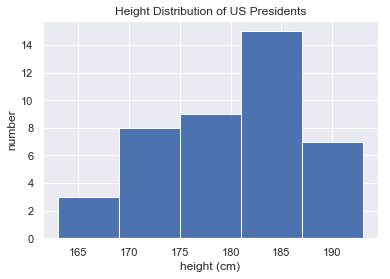

In [95]:
plt.hist(heights, bins=5)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

# Computation on Arrays: Broadcasting

In [96]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [97]:
# scalar 5 is broatcasted to one dimm array
a + 5

array([5, 6, 7])

In [98]:
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [99]:
# array a is stretched, or broadcast to 2-dimm array
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [100]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print('a: \n', a)
print('b: \n', b)
print('a + b: \n', a + b)

a: 
 [0 1 2]
b: 
 [[0]
 [1]
 [2]]
a + b: 
 [[0 1 2]
 [1 2 3]
 [2 3 4]]


In [5]:
%%html
<img src="imgs/numpy_broad.png">

## Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

• Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

• Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

• Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [102]:
# Examples:

In [103]:
M = np.ones((2, 3))
a = np.arange(3)

# M.shape = (2, 3)
# a.shape = (3,)

# M.shape -> (2, 3)
# a.shape -> (2, 3)

M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [104]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

# a.shape = (3, 1)
# b.shape = (3,)

# Rule 1 says we must pad the shape of b with ones:
# a.shape -> (3, 1)
# b.shape -> (1, 3)

# And rule 2 tells us that we upgrade each of these ones to match 
# the corresponding size of the other array:
# a.shape -> (3, 3)
# b.shape -> (3, 3)

a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [105]:
M = np.ones((3, 2))
a = np.arange(3)

# The shapes of the arrays are:
#     M.shape = (3, 2)
#     a.shape = (3,)

# Again, rule 1 tells us that we must pad the shape of a with ones: 
#     M.shape -> (3, 2)
#     a.shape -> (1, 3)

# By rule 2, the first dimension of a is stretched to match that of M:
#     M.shape -> (3, 2)
#     a.shape -> (3, 3)

# Now we hit rule 3—the final shapes do not match, so these two arrays are incompatible, 
# as we can observe by attempting this operation:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [106]:
# If right-side padding is what you’d like, you can do this explicitly 
# by reshaping the array
M + a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

In [107]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

## Broadcasting in Practice

In [108]:
# 1. Centering an array
# We can compute the mean of each feature using the mean aggregate 
# across the first dimension

In [109]:
X = np.random.random((10, 3))

In [110]:
Xmean = X.mean(axis=0)
Xmean

array([ 0.49255915,  0.33550339,  0.47239821])

In [111]:
X_centered = X - Xmean

# Now mean near zero
X_centered.mean(axis=0)

array([  9.99200722e-17,  -6.66133815e-17,   4.44089210e-17])

In [112]:
# 2. Plotting a two-dimensional function

# One place that broadcasting is very useful is in displaying images based on 
# two-dimensional functions. If we want to define a function z = f(x, y), 
# broadcasting can be used to compute the function across the grid:

In [113]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

In [114]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

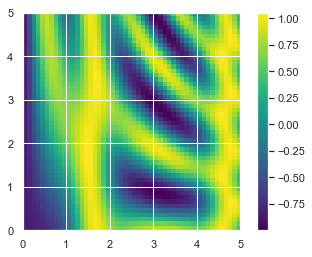

In [115]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

In [116]:
z.shape, y.shape, x.shape

((50, 50), (50, 1), (50,))

# Comparisons, Masks, and Boolean Logic

In [117]:
# 1. Example: Counting Rainy Days
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values 
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [118]:
# The array contains 365 values, giving daily rainfall in inches 
# from January 1 to December 31, 2014.

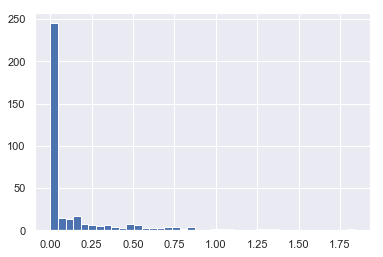

In [119]:
# As a first quick visualization, let’s look at the histogram of rainy days
plt.hist(inches, 40);

This histogram gives us a general idea of what the data looks like: despite its reputa‐ tion, the vast majority of days in Seattle saw near zero measured rainfall in 2014. But this doesn’t do a good job of conveying some information we’d like to see: for exam‐ ple, how many rainy days were there in the year? What is the average precipitation on those rainy days? How many days were there with more than half an inch of rain?


## Comparison Operators as ufuncs

In [120]:
x = np.array([1, 2, 3, 4, 5])

In [121]:
x > 3

array([False, False, False,  True,  True], dtype=bool)

In [122]:
x < 3

array([ True,  True, False, False, False], dtype=bool)

In [123]:
x <= 3

array([ True,  True,  True, False, False], dtype=bool)

In [124]:
x >= 3

array([False, False,  True,  True,  True], dtype=bool)

In [125]:
x != 3

array([ True,  True, False,  True,  True], dtype=bool)

In [126]:
x == 3

array([False, False,  True, False, False], dtype=bool)

In [127]:
# work on arrays of any size and shape
# and with computation:
(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

In [128]:
# == np.equal()
# != np.not_equal()
# < np.less()
# <= np.less_equal()
# > np.greater()
# >= np.greater_equal()

In [129]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [130]:
# Counting entries

# how many values less than 6?
np.count_nonzero(x < 6)

8

In [131]:
# Another way to get at this information is to use np.sum; 
# in this case, False is interpreted as 0, and True is inter‐ preted as 1:
np.sum(x < 6)

8

In [132]:
np.count_nonzero(x < 6, axis=1)

array([4, 2, 2])

In [133]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [134]:
# are there any values greater than 8? 
np.any(x > 8)

True

In [135]:
# are all values less than 10? 
np.all(x < 10)

True

In [136]:
# are all values in each row less than 8? 
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

## Boolean operators

In [137]:
inches.shape

(365,)

In [138]:
np.sum((inches > 0.5) & (inches < 1))

29

In [139]:
# equal

In [140]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [141]:
# & np.bitwise_and 
# | np.bitwise_or 
# ^ np.bitwise_xor 
# ~ np.bitwise_not

## Boolean Arrays as Masks

In [142]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [143]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

In [144]:
# Now to select these values from the array, 
# we can simply index on this Boolean array; this is known as a masking operation

In [145]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [146]:
# construct a mask of all rainy days 
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.194881889764
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


In [147]:
summer

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# Using the Keywords and/or Versus the Operators &/|

In [148]:
# When you use and or or, it’s equivalent to asking Python to treat the 
# object as a single Boolean entity. 
# In Python, all nonzero integers will evaluate as True. Thus:

In [149]:
bool(42), bool(0)

(True, False)

In [150]:
bool(42 & 0)

False

In [151]:
42 & 21

0

In [152]:
# When you use & and | on integers, the expression operates on the bits of the element,
# applying the and or the or to the individual bits making up the number:

In [153]:
bin(42)

'0b101010'

In [154]:
bin(59)

'0b111011'

In [155]:
0b101010
0b111011
0b101010

42

In [156]:
bin(0b101010 & 0b111011)

'0b101010'

In [157]:
bin(0b101010 | 0b111011)

'0b111011'

In [158]:
# When you have an array of Boolean values in NumPy, 
# this can be thought of as a string of bits where 1 = True and 0 = False, 
# and the result of & and | operates in a similar manner as before:

In [159]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool) 
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool) 
A & B

array([ True, False,  True, False,  True, False], dtype=bool)

In [160]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the indi‐ vidual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.

# Fancy Indexing

In [161]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10) 
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [162]:
# access three different elements. We could do it like this:
[x[3], x[7], x[2]]

[71, 86, 14]

In [163]:
# Alternatively, we can pass a single list or array of indices to obtain the same result:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [164]:
# With fancy indexing, the shape of the result reflects 
# the shape of the index arrays rather than the shape of the array being indexed:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [165]:
# Fancy indexing also works in multiple dimensions. Consider the following array:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [166]:
X.shape

(3, 4)

In [167]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

the first value in the result is X[0, 2], the second is X[1, 1], and the third is X[2, 3]. The pairing of indices in fancy indexing follows all the broadcasting rules

In [168]:
X[row[:, np.newaxis]]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [169]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

# It is always important to remember with fancy indexing that the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed.

In [170]:
# PS: при индексации массивом получается, что row располагает строки в том порядке своих значений! 
# То есть бродкастится массив индексов, а не сами массивы

In [172]:
row[:, np.newaxis].shape

(3, 1)

In [173]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [174]:
X[row[:, np.newaxis], :]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [175]:
X[row[:, np.newaxis][:, np.newaxis]].shape

(3, 1, 1, 4)

In [176]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [177]:
np.repeat(np.arange(3), 3).reshape(3, 3)

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [178]:
a = np.array([[0, 2 ,2], [0, 2 ,2], [0, 2 ,2]])
a

array([[0, 2, 2],
       [0, 2, 2],
       [0, 2, 2]])

In [179]:
a1 = np.zeros(6).reshape(2,3).astype(int)
a1

array([[0, 0, 0],
       [0, 0, 0]])

## Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we’ve seen:

In [180]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [181]:
# fancy + simple
X[2, [2, 3]]

array([10, 11])

In [182]:
# fancy + slicing
X[:, [2, 3]]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

In [183]:
# fancy + mask
mask = np.array([0, 1, 0, 1], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

# Example 1: Selecting Random Points

In [189]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [188]:
# rand.multivariate_normal - Многомерное нормальное распределение
# https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

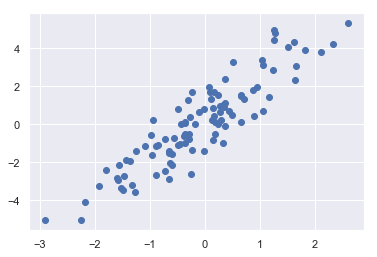

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling 
plt.scatter(X[:, 0], X[:, 1]);

Let’s use fancy indexing to select 20 random points. 
We’ll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the origi‐ nal array:

In [209]:
# np.random.choice if replace True its like np.random.permutation
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([42, 84, 67,  9, 10, 73, 68, 61, 81, 74, 37, 34, 48, 21, 94,  3, 24,
       98, 17, 90])

In [211]:
selection = X[indices] # fancy indexing here selection.shape
selection.shape

(20, 2)

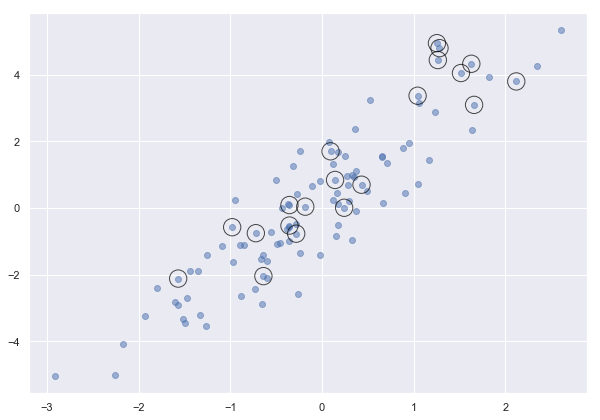

In [237]:
plt.rcParams['figure.figsize'] = 10, 7

# s - size in points^2, alpha - transparency, 
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(selection[:, 0], selection[:, 1], alpha=0.7, facecolor='none', s=300, edgecolors='black');

# Example 2: Modifying Values with Fancy Indexing

In [240]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99 
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [241]:
x[i] -= 10 
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [245]:
x = np.zeros(10)
x[[0, 0]] = [4, 5]
print(x)

[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [247]:
x[[0, 0]]

array([ 5.,  5.])

Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.

### but

In [246]:
i = [2, 3, 3, 4, 4, 4] 
x[i] += 1
x

array([ 5.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

You might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

In [249]:
# if need to repeat asining (np.reduceat()): 
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


# Example 3: Binning Data

In [257]:
np.random.seed(42)

# Return a sample (or samples) from the "standard normal" distribution.
# If positive, int_like or int-convertible arguments are provided,
# `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
# with random floats sampled from a univariate "normal" (Gaussian)
# distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
# floats, they are first converted to integers by truncation). A single
# float randomly sampled from the distribution is returned if no
# argument is provided.
x = np.random.randn(100)

In [258]:
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x) 

# add 1 to each of these bins
np.add.at(counts, i, 1)

In [259]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

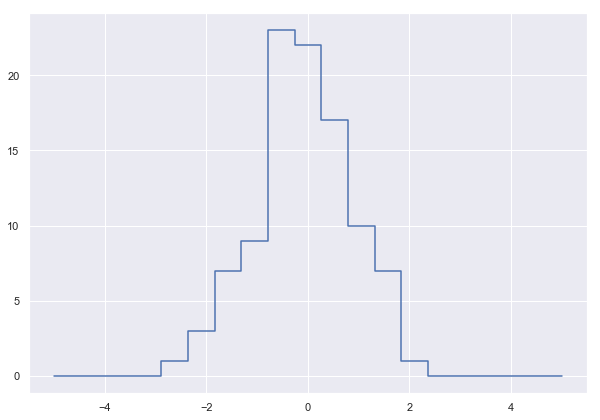

In [264]:
# linestyle='steps' - for hist!
plt.plot(bins, counts, linestyle='steps');

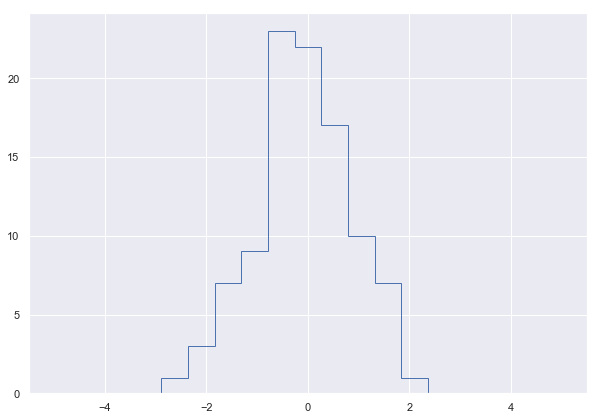

In [268]:
plt.hist(x, bins, histtype='step');

In [275]:
np.searchsorted([1,3,5], [2, 4])

array([1, 2])

In [269]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

NumPy routine:
58.7 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [270]:
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine:
15.8 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [276]:
x = np.random.randn(1000000) 
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

NumPy routine:
64.8 ms ± 803 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [277]:
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine:
116 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


--------------

# Sorting arrays

In [287]:
# O [N * N!]
def bogosort(x):
    i = 0
    while np.any(x[:-1] > x[1:]):
        i += 1
        np.random.shuffle(x) 
    return x, i

In [301]:
x = np.array([2, 7, 1, 4, 8, 6, 9, 3, 5,])

In [302]:
bogosort(x) 

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 584364)

### by default in numpy - O[N log N] quick sorting

In [304]:
x = np.array([2, 1, 4, 3, 5])
# or x.sort()
np.sort(x) 

array([1, 2, 3, 4, 5])

In [307]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i, x[i])

[1 0 3 2 4] [1 2 3 4 5]


### Sorting along rows or columns

In [6]:
rand = np.random.RandomState(42) 
X = rand.randint(0, 10, (4, 6)) 
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [310]:
# sort each column of X 
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [312]:
# sort each row of X 
# Keep in mind that this treats each row or column as an independent array, 
# and any relationships between the row or column values will be lost!
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Partial Sorts: Partitioning

In [318]:
# np.partition takes an array and a number K; 
# the result is a new array with the small‐ est K values to the left of the partition, 
# and the remaining values to the right, in arbi‐ trary order
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 4)

array([2, 1, 3, 4, 5, 6, 7])

In [5]:
x = np.arange(9, 0, -1)
np.partition(x, 4)

array([4, 1, 2, 3, 5, 8, 6, 7, 9])

In [7]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [9]:
# np.argsort
# np.argpartition

# Example 1: k-Nearest Neighbors

Let’s quickly see how we might use this argsort function along multiple axes to find the nearest neighbors of each point in a set.

In [10]:
X = rand.rand(10, 2)

In [16]:
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

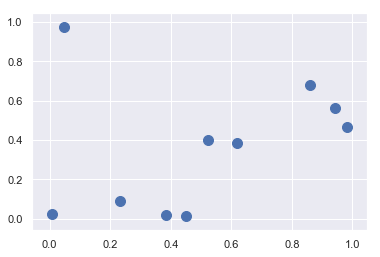

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling 
plt.scatter(X[:, 0], X[:, 1], s=100);

now we’ll compute the distance between each pair of points. Recall that the squared- distance between two points is the sum of the squared differences in each dimension; using the efficient broadcasting (“Computation on Arrays: Broadcasting” on page 63) and aggregation (“Aggregations: Min, Max, and Everything in Between” on page 58) routines provided by NumPy, we can compute the matrix of square distances in a sin‐ gle line of code:

In [24]:

X[:,np.newaxis,:]

array([[[ 0.00706631,  0.02306243]],

       [[ 0.52477466,  0.39986097]],

       [[ 0.04666566,  0.97375552]],

       [[ 0.23277134,  0.09060643]],

       [[ 0.61838601,  0.38246199]],

       [[ 0.98323089,  0.46676289]],

       [[ 0.85994041,  0.68030754]],

       [[ 0.45049925,  0.01326496]],

       [[ 0.94220176,  0.56328822]],

       [[ 0.3854165 ,  0.01596625]]])

In [18]:
X[:,np.newaxis,:].shape

(10, 1, 2)

In [25]:
X[np.newaxis,:,:]

array([[[ 0.00706631,  0.02306243],
        [ 0.52477466,  0.39986097],
        [ 0.04666566,  0.97375552],
        [ 0.23277134,  0.09060643],
        [ 0.61838601,  0.38246199],
        [ 0.98323089,  0.46676289],
        [ 0.85994041,  0.68030754],
        [ 0.45049925,  0.01326496],
        [ 0.94220176,  0.56328822],
        [ 0.3854165 ,  0.01596625]]])

In [26]:
# Разложили координаты точек по разным измерениям. Для того чтобы они пробродкастились при вычитании:

In [27]:
(X[:,np.newaxis,:] - X[np.newaxis,:,:]).shape

(10, 10, 2)

In [29]:
# получаем разность координат всех со всеми
X[:,np.newaxis,:] - X[np.newaxis,:,:]

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [52]:
# Что значит axis=-1 ???
# это последняя ось
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [53]:
dist_sq.shape

(10, 10)

In [57]:
# Another:

In [54]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :] 
differences.shape

(10, 10, 2)

In [55]:
# square the coordinate differences 
sq_differences = differences ** 2 
sq_differences.shape

(10, 10, 2)

In [56]:
# sum the coordinate differences to get the squared distance 
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [58]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [61]:
nearest = np.argsort(dist_sq, axis=1) 
# the first column gives the numbers 0 through 9 in order: 
# this is due to the fact that each point’s closest neighbor is itself
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [62]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In [63]:
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]])

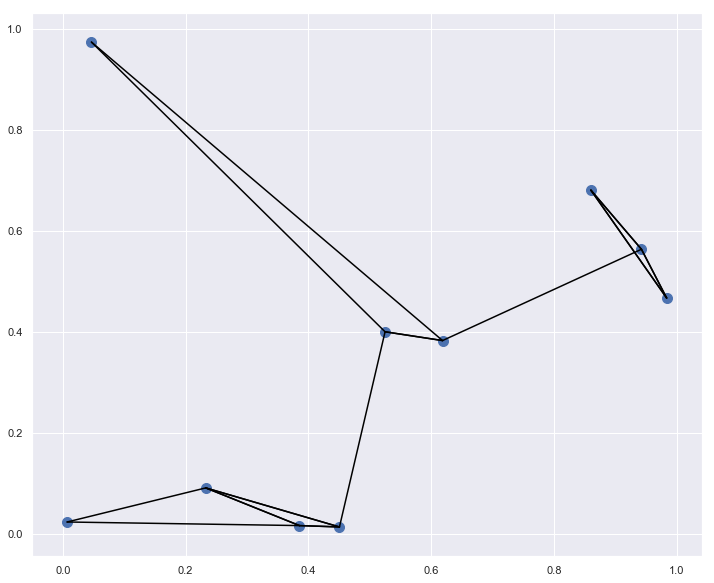

In [68]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen: 
        plt.plot(*zip(X[j], X[i]), color='black')

# Big O

In [70]:
# O[N] - 1000 items per 1 sec -> 5000 per 5 sec
# O[N ** 2] - 1000 items per 1 sec -> 5000 per 25 sec

In [71]:
# Notice that the big-O notation by itself tells you nothing about the actual wall-clock
# time of a computation, but only about its scaling as you change N.

In [72]:
# В общем это не про скорость как таковую, а про масштибируемость

# Structured Data: NumPy’s Structured Arrays

In [74]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [75]:
x = np.zeros(4, dtype=int)

In [76]:
# Use a compound data type for structured arrays
data = np.zeros(
    4, 
    dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')}
)

In [77]:
data

array([('', 0,  0.), ('', 0,  0.), ('', 0,  0.), ('', 0,  0.)], 
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

Here 'U10' translates to “Unicode string of maximum length 10,” 'i4' translates to “4-byte (i.e., 32 bit) integer,” and 'f8' translates to “8-byte (i.e., 64 bit) float.” We’ll discuss other options for these type codes in the following section.

In [78]:
data['name'] = name
data['age'] = age
data['weight'] = weight 
print(data)

[('Alice', 25,  55. ) ('Bob', 45,  85.5) ('Cathy', 37,  68. )
 ('Doug', 19,  61.5)]


In [79]:
data[0]

('Alice', 25,  55.)

In [80]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], 
      dtype='<U10')

In [81]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], 
      dtype='<U10')

In [84]:
# types can be specified with Python types or NumPy dtypes instead
np.dtype({
    'names':('name', 'age', 'weight'), 
    'formats':((np.str_, 10), int, np.float32)
})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [85]:
np.dtype?

Init signature: np.dtype(self, /, *args, **kwargs)
Docstring:     
dtype(obj, align=False, copy=False)

Create a data type object.

A numpy array is homogeneous, and contains elements described by a
dtype object. A dtype object can be constructed from different
combinations of fundamental numeric types.

Parameters
----------
obj
    Object to be converted to a data type object.
align : bool, optional
    Add padding to the fields to match what a C compiler would output
    for a similar C-struct. Can be ``True`` only if `obj` is a dictionary
    or a comma-separated string. If a struct dtype is being created,
    this also sets a sticky alignment flag ``isalignedstruct``.
copy : bool, optional
    Make a new copy of the data-type object. If ``False``, the result
    may just be a reference to a built-in data-type object.

See also
--------
result_type

Examples
--------
Using array-scalar type:

>>> np.dtype(np.int16)
dtype('int16')

Structured type, one field name 'f1', containing in

## More Advanced Compound Types

In [86]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)

print(X[0]) 
print(X['mat'][0])

(0, [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]])
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


## RecordArrays: Structured Arrays with a Twist

In [88]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [90]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [91]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

223 ns ± 2.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.11 µs ± 51.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.35 µs ± 90.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
